In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from playervectors.playervectors import PlayerVectors
from playervectors.helpers import (
    ExtractPlayers, 
    ExtractTeams, 
    ExtractMinutesPlayed, 
    ExtractGoalkeepers 
)

## Load: Players

In [2]:
df_players = pd.read_csv('event_streams/players.csv')
df_players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,NaN,Tekin,4502.0,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687.0
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,NaN,Sarr,3775.0,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423.0
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,NaN,Mandanda,3772.0,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,NaN,O. Mandanda,NaN
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,NaN,N'Diaye,683.0,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314.0
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,NaN,Konat\u00e9,2975.0,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,NaN


#### Extract Player Information

In [3]:
# Extract a mapping of player IDs to selected attributes (first name, last name, team ID)
players = ExtractPlayers(df=df_players,
                         wy_id='wyId',
                         attributes=['firstName', 'lastName', 'currentTeamId'])

In [4]:
df_playerank = pd.read_csv('event_streams/playerank.csv')
df_playerank.head()

,goalScored,playerankScore,matchId,playerId,roleCluster,minutesPlayed
0,0,0.0053,2057991,10014,right CB,90
1,0,0.0009,2057992,10014,right CB,41
2,0,-0.0013,2057998,100140,central MF,90
3,0,0.0031,2058000,100140,left CB,90
4,0,0.0035,2499869,10108,right CB,90


#### Extract Goalkeepers

In [5]:
keepers = ExtractGoalkeepers(df_players,
                             wy_code='name',
                             keeper_str='Goalkeeper')

#### Extract Played Minutes

In [6]:
# Mapping {player_id -> played_minutes}
minutes_played = ExtractMinutesPlayed(df=df_playerank,
                                      column_player='playerId',
                                      column_minutes='minutesPlayed')

## Load: Event Streams

In [7]:
df_events = pd.read_csv('event_streams/actions.csv')
df_events.head()

,Unnamed: 0,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,type_name,result_name,bodypart_name
0,0,2500089,1,2.763597,1659,9637,52.50,34.00,63.00,30.60,251700146.0,0,0,1,0,pass,success,foot
1,1,2500089,1,4.761353,1659,8351,63.00,30.60,64.05,10.20,251700147.0,0,0,1,1,pass,success,foot
2,2,2500089,1,5.533097,1659,9285,64.05,10.20,72.45,20.40,251700148.0,0,0,1,2,pass,success,foot
3,3,2500089,1,7.707561,1659,239411,72.45,20.40,35.70,19.04,251700161.0,0,0,1,3,pass,success,foot
4,4,2500089,1,11.614943,1659,9637,35.70,19.04,30.45,12.24,251700149.0,0,0,1,4,pass,success,foot


In [8]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2462726 entries, 0 to 2462725
Data columns (total 18 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   game_id            int64  
 2   period_id          int64  
 3   time_seconds       float64
 4   team_id            int64  
 5   player_id          int64  
 6   start_x            float64
 7   start_y            float64
 8   end_x              float64
 9   end_y              float64
 10  original_event_id  float64
 11  bodypart_id        int64  
 12  type_id            int64  
 13  result_id          int64  
 14  action_id          int64  
 15  type_name          object 
 16  result_name        object 
 17  bodypart_name      object 
dtypes: float64(6), int64(9), object(3)
memory usage: 338.2+ MB


#### Normalize Playing Direction

In [9]:
df_events['start_x'] = (df_events['start_x'] / 105) * 100
df_events['start_y'] = (df_events['start_y'] / 68) * 100

df_events['start_x'] = 100 - df_events['start_x']
df_events['start_y'] = 100 - df_events['start_y']

#### Remove Goalkeepers

In [10]:
df_events = df_events[~df_events['player_id'].isin(list(keepers.keys()))]

## Load: Teams

In [11]:
df_teams = pd.read_csv('event_streams/teams.csv')
df_teams.head()

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


#### Extract Team Information

In [12]:
# Extracting Team Information
# Mapping {teamID -> [selected attributes e.g. TeamName, City, ...]}
teams = ExtractTeams(df=df_teams,
                     wy_id='wyId',
                     attributes=['name'])

In [13]:
# Mapping {teamID -> [list of playerIDs]}
teamID_to_playerIDs = {}

# Mapping {playerID -> Player Name}
playersID_to_name = {}

for playerID, attributes in players.items():
    first, last, teamID = attributes[0], str(attributes[1]), str(attributes[2])
    
    if teamID not in teamID_to_playerIDs:
        teamID_to_playerIDs[teamID] = [playerID]
    else:
        teamID_to_playerIDs[teamID].append(playerID)
    
    if playerID not in playersID_to_name:
        playersID_to_name[playerID] = f'{first} {last}'

## Building Player Vectors

### 1. Selecting Relevant Action Types
Let $k_t$ be the number of principal components chosen to compress heatmaps of action type $t$.

According to the paper, $k_t$ with $t \in \{\text{shot}, \text{cross}, \text{dribble}, \text{pass}\}$ with corresponding components $\{4, 4, 5, 5\}$ is the minimal number of components needed to explain
70% of the variance in the heatmaps of action type $t$.

This parameter setting
was empirically found to work well because of the high variability of players
positions in their actions (see Challenge 1 in Section 2 in the paper).

Ignoring 30% of the variance allows to summarize a player’s playstyle only by his dominant regions
on the field rather than model every position on the field he ever occupied.

### 2. Constructing Heatmaps

* 2.1 Counting

* 2.2 Normalizing

* 3.3 Smoothing

### 3. Compressing Heatmaps to Vectors

* 3.1 Reshaping

* 3.2 Construct the matrix M

* 3.3 Compress matrix M by applying non-negative matrix factorization (NMF)

### 4. Assembling Player Vectors

In [14]:
pvs = PlayerVectors(grid=(50, 50),
                    sigma=4.0,
                    actions=['shot', 'cross', 'dribble', 'pass'],
                    components=[4, 4, 5, 5])

pvs.fit(df_events=df_events,
        minutes_played=minutes_played,
        player_names=playersID_to_name,
        verbose=True)

Action: shot	Shape of M: (2500, 2798)	Shape of W: (2500, 4)	Shape of H: (4, 2798)
Action: cross	Shape of M: (2500, 2798)	Shape of W: (2500, 4)	Shape of H: (4, 2798)
Action: dribble	Shape of M: (2500, 2798)	Shape of W: (2500, 5)	Shape of H: (5, 2798)
Action: pass	Shape of M: (2500, 2798)	Shape of W: (2500, 5)	Shape of H: (5, 2798)


## 18 Components of our Player Vectors 
The 18 components of our player vectors constructed by compressing heatmaps
of shots (1-4), crosses (5-8), dribbles (9-13), and passes (14-18) with non-negative
matrix factorization

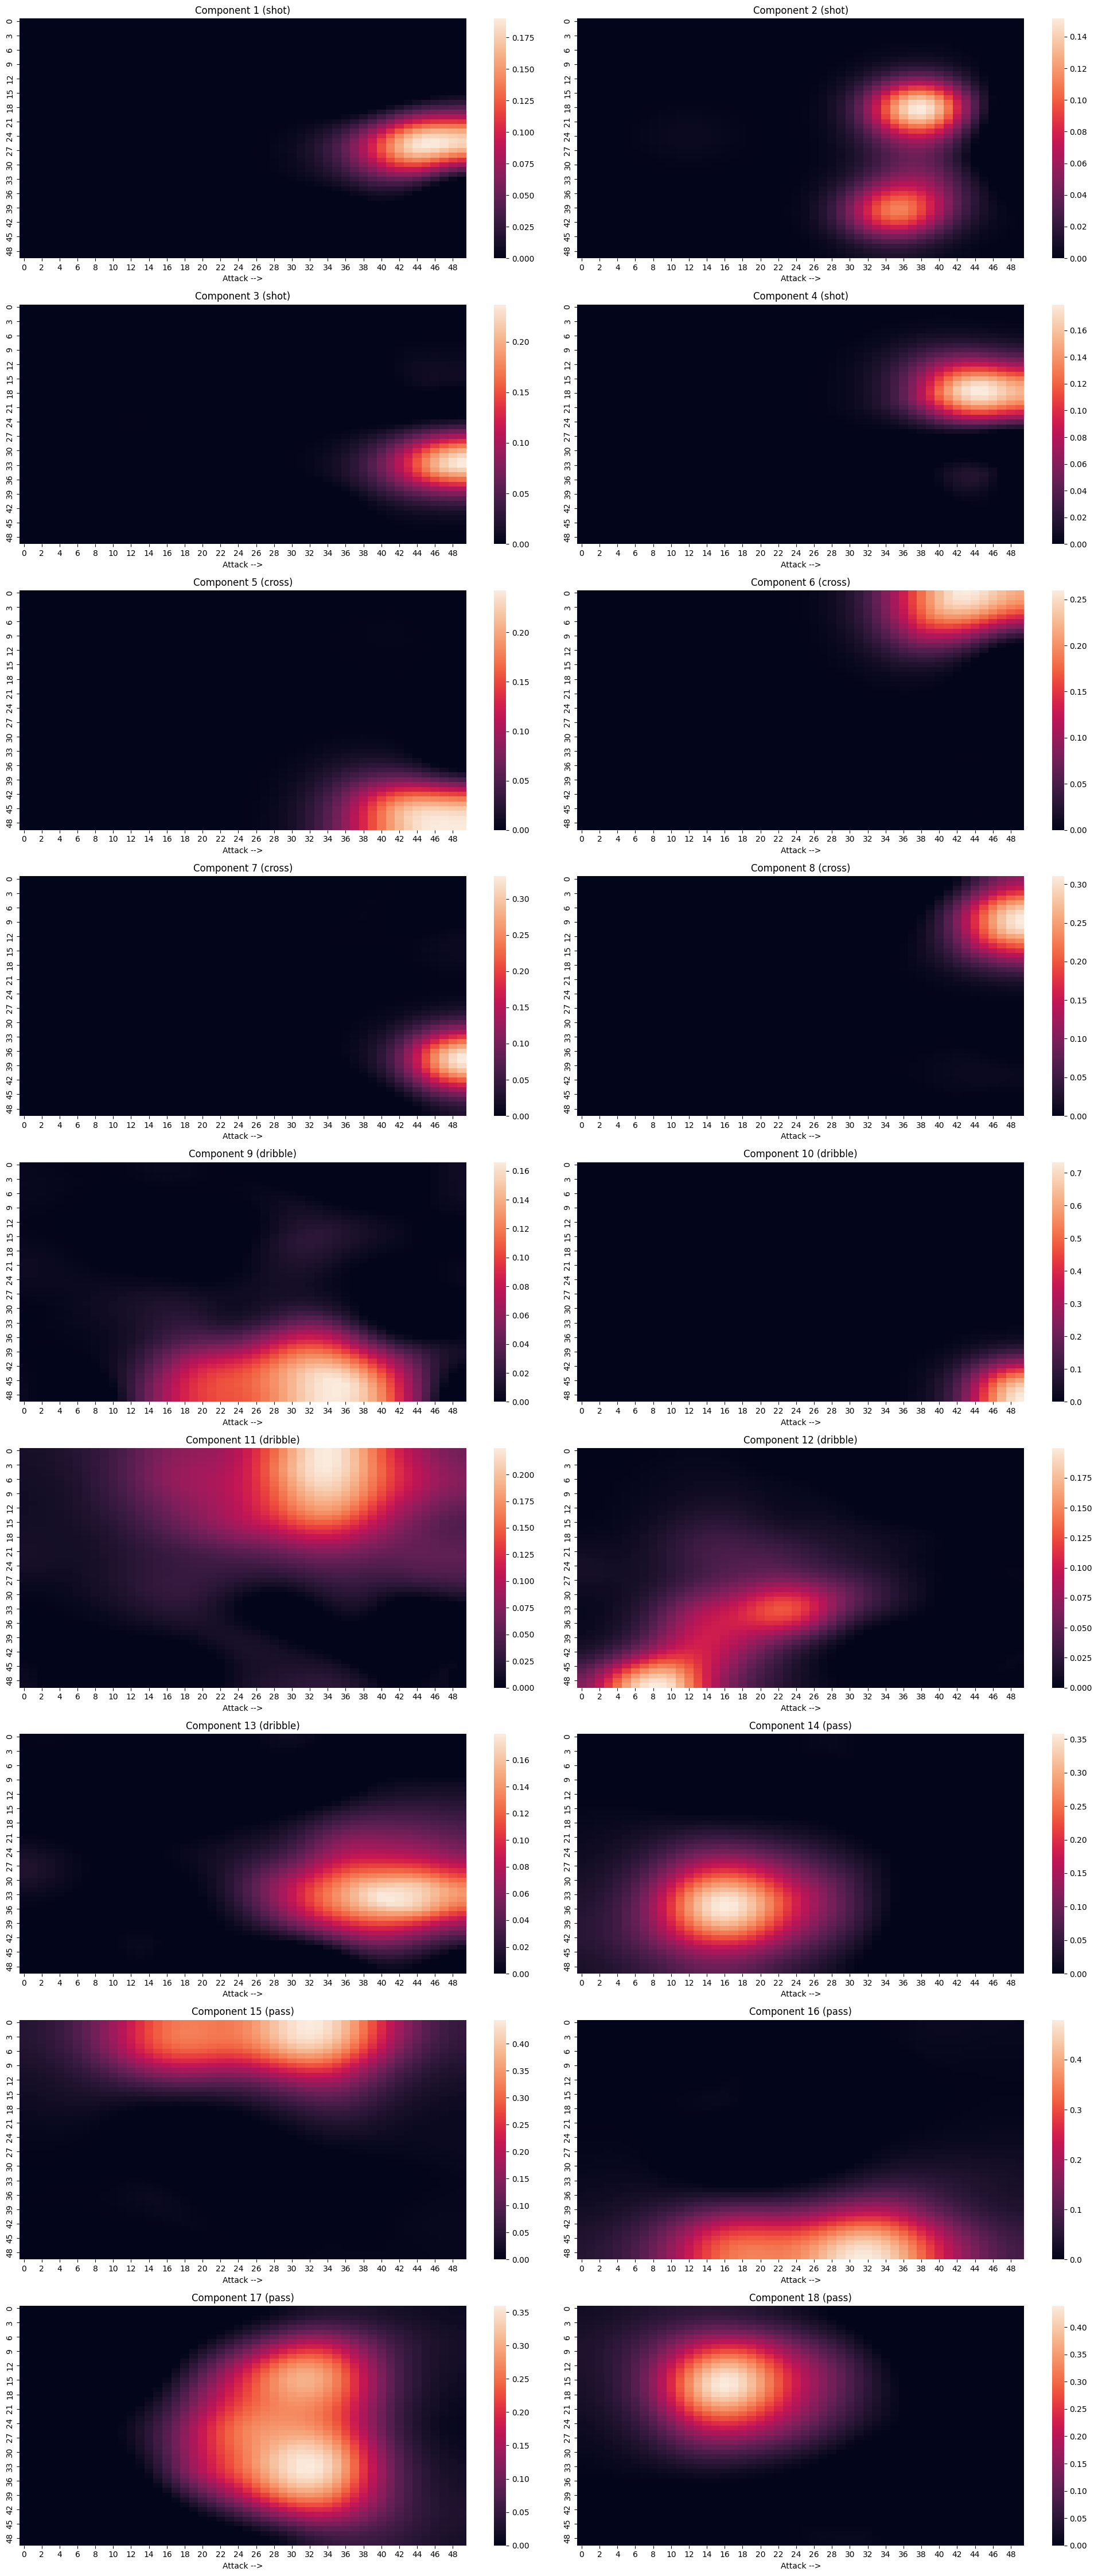

In [15]:
pvs.plot_principle_components(figsize=(20, 45))
plt.show()

### Interpretation

* Component (1): Close shot

* Component (2): Far shot

* Component (3): Far shot right

* Component (4): Close shot right

* Component (5): R. corner cross

* Component (6): L. backline cross

* Component (7): R. flank cross

* Component (8): L. far backline cross

* Component (9): Center dribble (front)

* Component (10): L. flank dribble

* Component (11): R. corner dribble

* Component (12): Center dribble (back)

* Component (13): L. flank dribble

* Component (14): Center pass

* Component (15): Right flank pass

* Component (16): Right back pass

* Component (17): Left flank pass

* Component (17): Center pass (back)

## Boxplot Weight Distribution

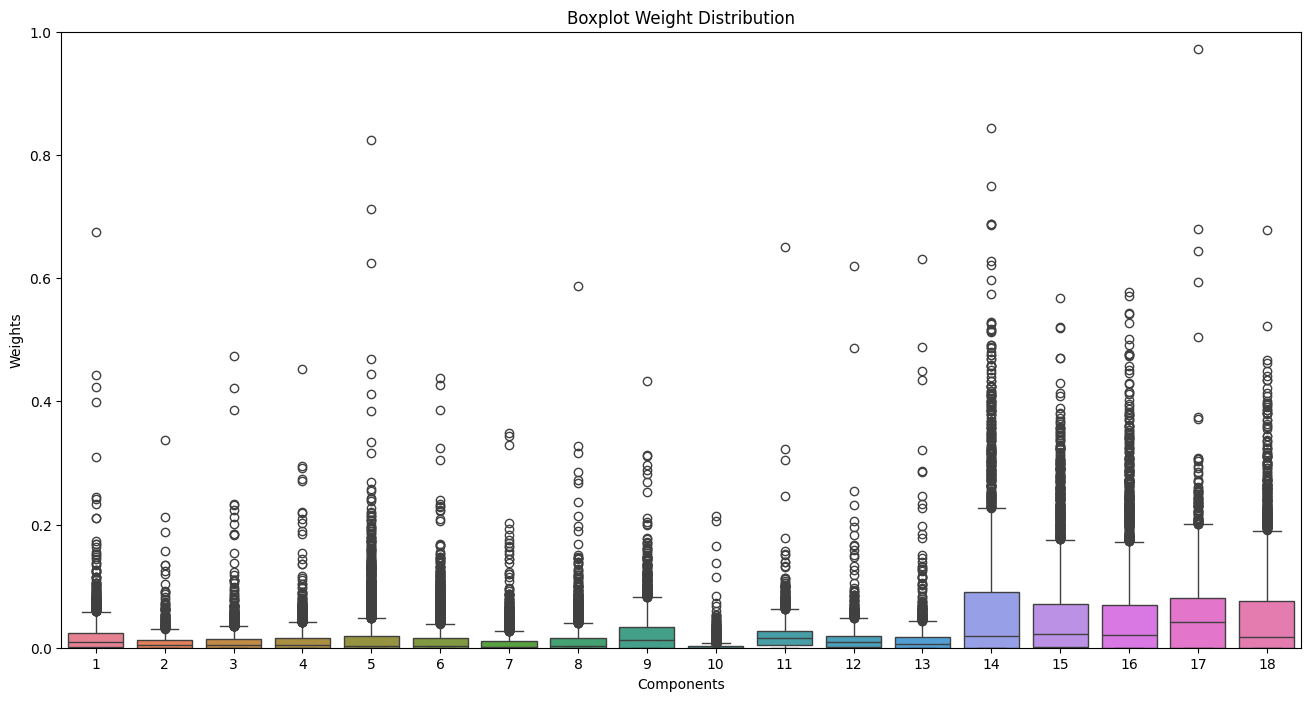

In [16]:
pvs.plot_distribution()
plt.show()

## Weights of the 18 Component Player Vectors

In [17]:
selected_players = [14817,       # Robert Lewandowski,   Postion: Center forward
                    3322,        # Christiano Ronaldo,   Postion: Center forward
                    370,         # Virgil van Dijk,      Postion: Center back
                    3306,        # Sergio Ramos,         Position: Center back
                    38021,       # Kevin De Bruyne       Position: Central midfielder
                    130]         # Stefan de Vrij        Position: Central/right back

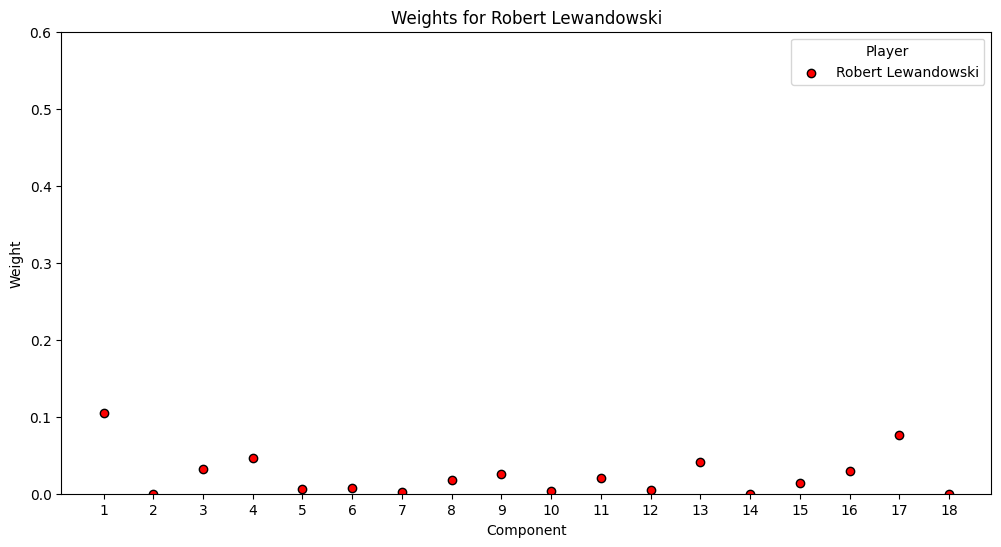

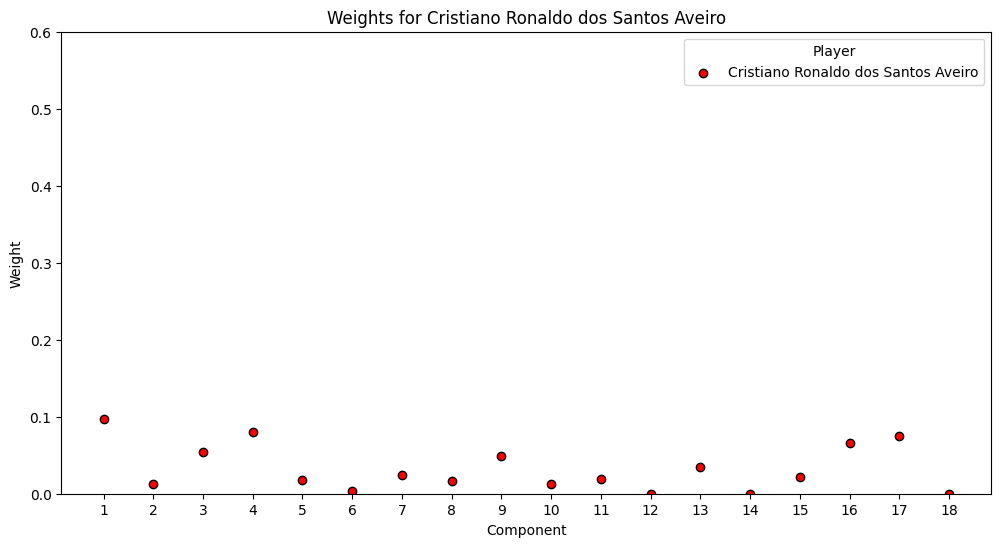

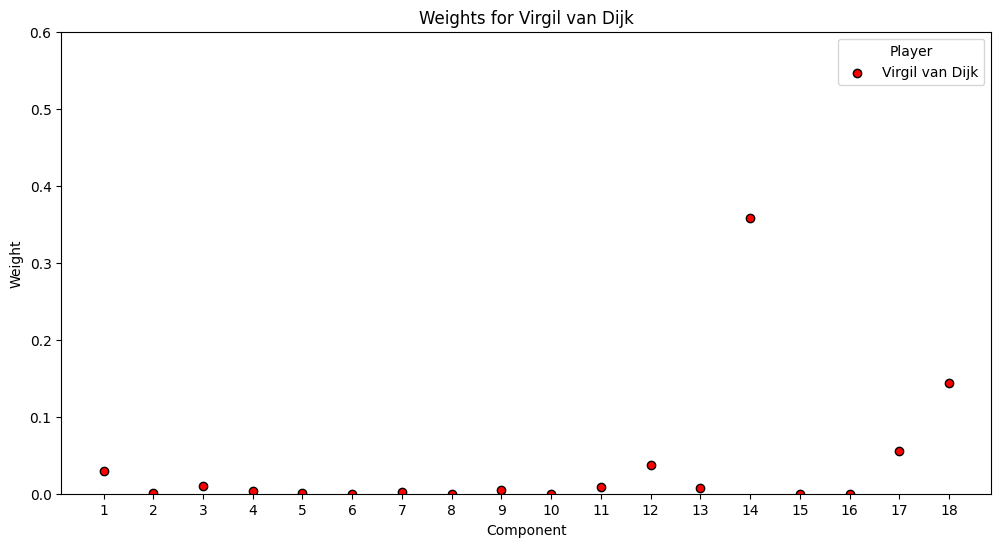

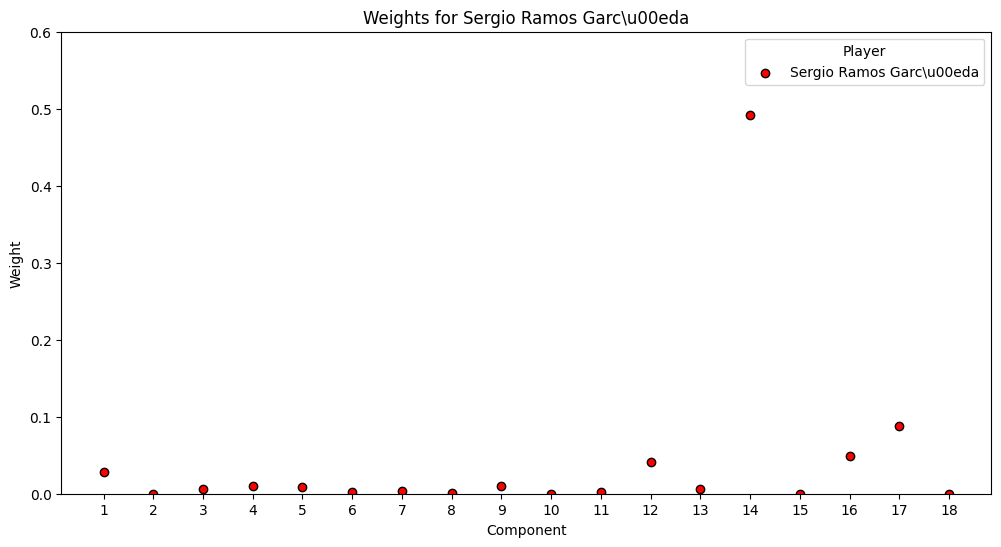

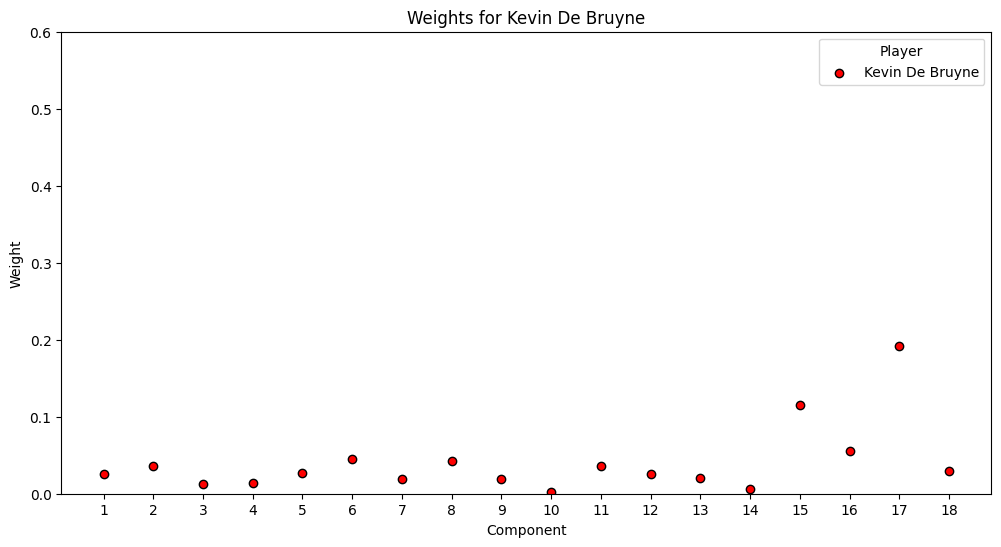

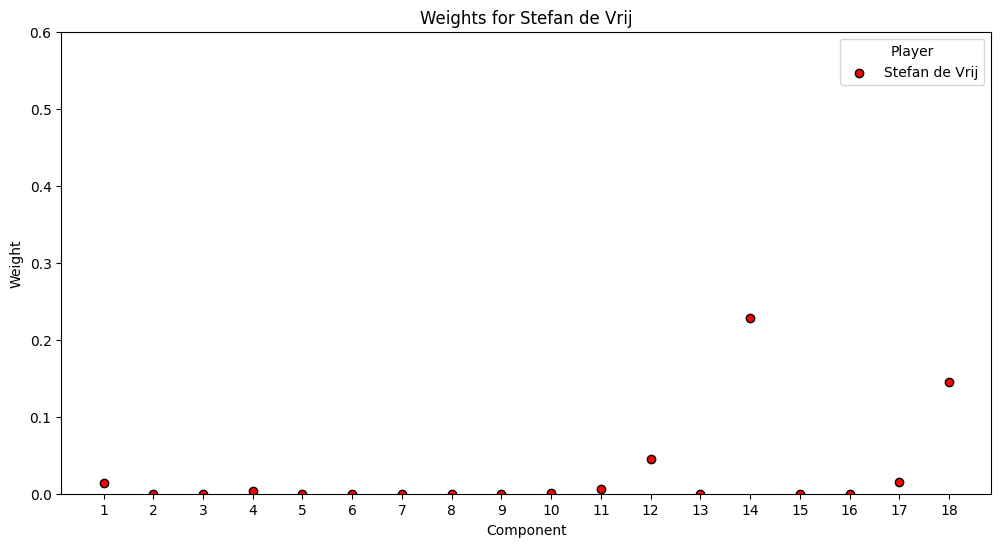

In [18]:
for player_id in selected_players:
    pvs.plot_weights(player_id=player_id)
plt.show()